<a href="https://colab.research.google.com/github/inamdarmihir/researchdocs/blob/main/TwitterKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

**Importing the Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

**Loading the dataset**

In [7]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      21602 non-null  int64 
 1   label   21602 non-null  int64 
 2   tweet   21602 non-null  object
dtypes: int64(2), object(1)
memory usage: 506.4+ KB


**Preprocessing the dataset**

In [9]:
#removes pattern in the input text
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word, "", input_txt)
  return input_txt

In [10]:
# removing twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]")

In [11]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can't use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,ser when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,ser ser thanks for #lyft credit i can t use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [13]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [14]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [15]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer  = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()


0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [16]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()



,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


**Exploratory Data Analysis**

In [17]:
# !pip install wordcloud 

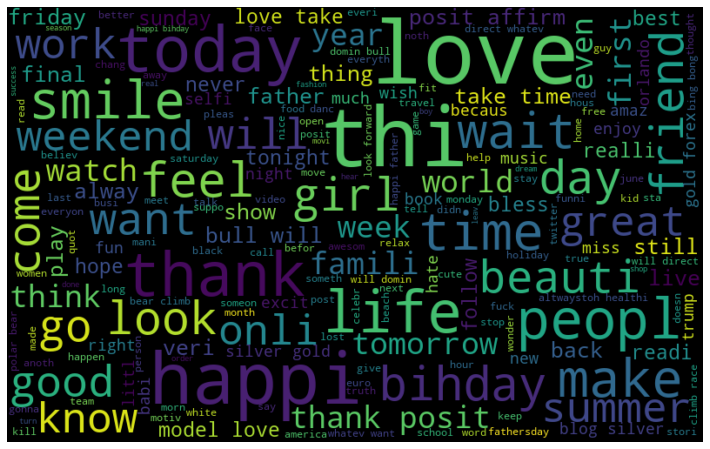

In [18]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud =   WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the figure
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

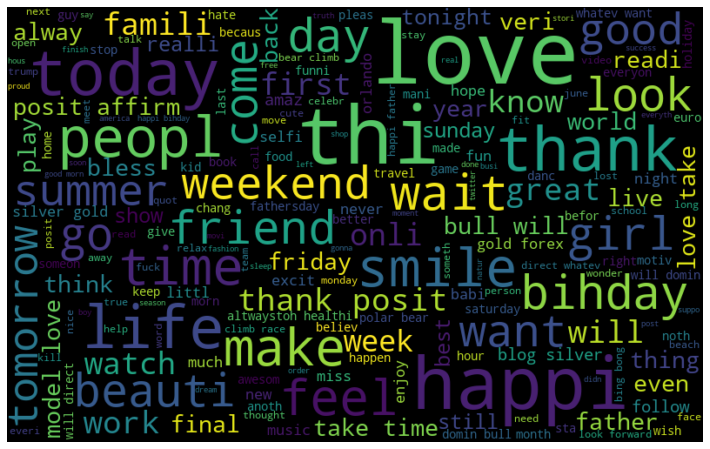

In [19]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the figure
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

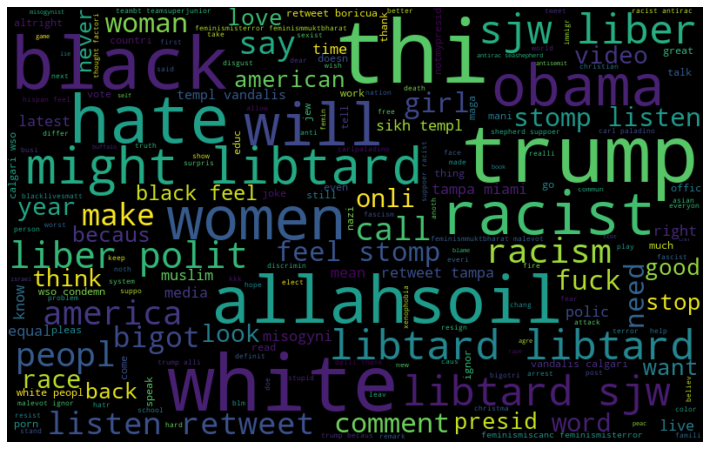

In [20]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the figure
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# extract the hashtag
def hashtag_extract(tweet):
  hashtags = []
  #loop words in the tweet
  for word in tweet:
    ht = re.findall(r"#(\w+)", word)
    hashtags.append(ht)
  return hashtags

In [25]:
# extract hashtags from non racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [26]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [27]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [28]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [29]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,49
1,lyft,1
2,disapoint,1
3,getthank,2
4,model,255


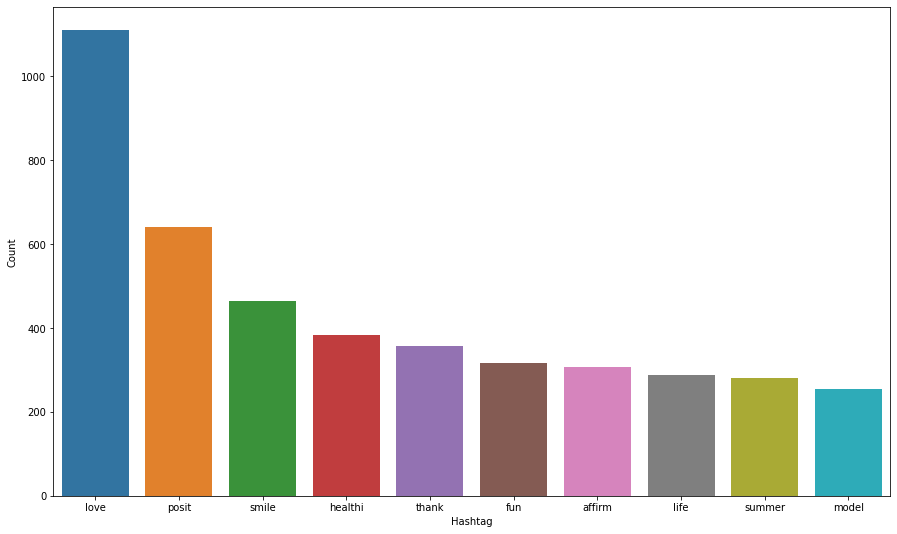

In [30]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y = 'Count')

In [31]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,8
1,michigan,2
2,tcot,8
3,australia,4
4,opkillingbay,4


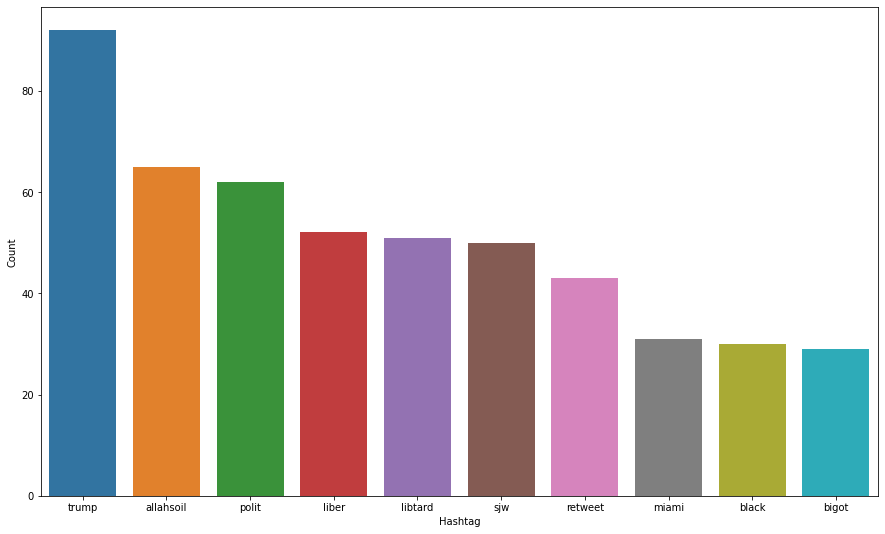

In [32]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y = 'Count')

**Input Split**

In [33]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [35]:
# bow[0].toarray()

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25 )

**Model Training**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [38]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [40]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.43893129770992373

In [44]:
accuracy_score(y_test,pred)

0.9455656359933345

In [46]:
# use probability to get output:
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)


0.49763779527559054

In [47]:
accuracy_score(y_test,pred)

0.9409368635437881

In [49]:
pred_prob[0][1] >= 0.3

False